<a href="https://colab.research.google.com/github/youssefsalah224/class-work-/blob/main/NN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practical Part #1

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train ,  x_test = x_train / 255.0 , x_test/255.0

In [5]:
len(x_train)

60000

In [6]:
x_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

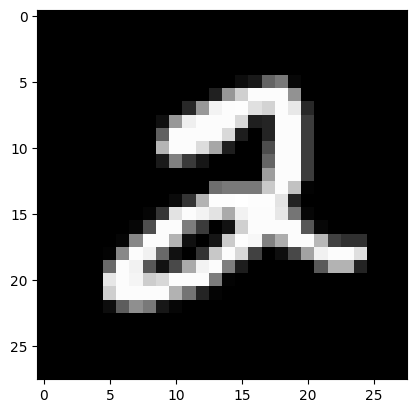

In [7]:
plt.imshow(x_train[5], cmap = "gray")

In [9]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer 2d to 1d

    keras.layers.Dense(128,activation = "relu"), # 1 hidden layer  relu > max(0,x) > 0.051

    keras.layers.Dense(10,activation = "softmax")  # output layer with 10 neure [0.01, 0.002, 0.85 ,0.2,0.5,0.25 ,0.1,0.05,0.07 ,0.51 ]
]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# adam Adaptive Moment Estimation (RMSporb+ Momenmtum) > Optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train,y_train ,epochs = 5 ,validation_data=(x_test, y_test) ) # train ,  test

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8771 - loss: 0.4330 - val_accuracy: 0.9551 - val_loss: 0.1474
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9635 - loss: 0.1241 - val_accuracy: 0.9700 - val_loss: 0.1002
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9762 - loss: 0.0811 - val_accuracy: 0.9727 - val_loss: 0.0875
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9826 - loss: 0.0578 - val_accuracy: 0.9748 - val_loss: 0.0812
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9878 - loss: 0.0420 - val_accuracy: 0.9755 - val_loss: 0.0798


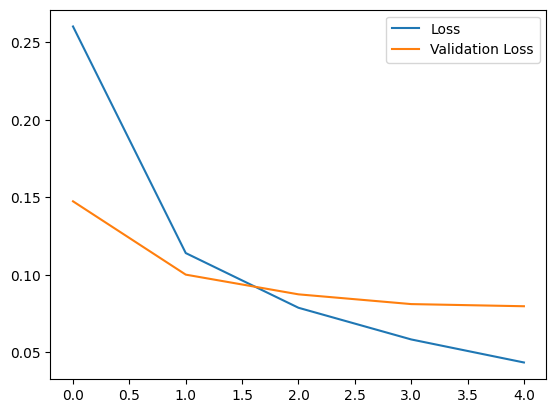

In [12]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [13]:
prediction = model.predict(x_test[14].reshape(1, 28, 28))
print("Prediction:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: 1


In [14]:
prediction

array([[1.5784241e-10, 9.9996150e-01, 8.1735196e-09, 1.3105986e-05,
        1.1644977e-06, 3.9244906e-08, 9.5934546e-08, 7.2179741e-06,
        1.6863714e-05, 2.1041732e-08]], dtype=float32)

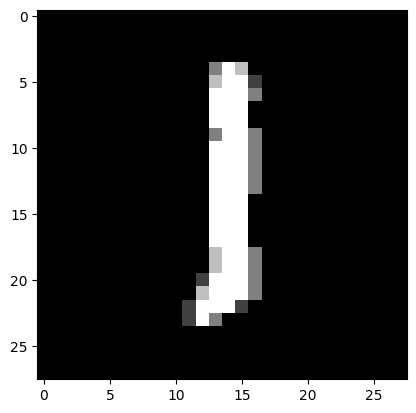

In [15]:
plt.imshow(x_test[14], cmap = "gray")

#Practical Part #2
## Splitting Data into Training, Validation, and Test Sets

**General Idea**

- **Training set**: The model learns from this data.  
- **Validation set**: Used during training to tune hyperparameters and prevent overfitting.  
- **Test set**: Kept aside until the very end to measure the model’s *true performance* on completely unseen data.  

**Important Note**:  
If you use `x_test` directly as your validation set, this is a mistake.  
Why? Because you will end up tuning your model on the same data that you later claim to be your “unseen test set,” which makes the final evaluation biased.  

✅ The correct workflow:
1. Split the dataset into **train + test** (e.g., 80% train, 20% test).  
2. From the **train** portion, further split into **train + validation** (e.g., 70% train, 10% validation, 20% test).  
3. Use the **validation set** only for model tuning.  
4. Use the **test set** once at the end for the final unbiased performance check.


In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 1) Load Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 2) Split Validation Set from Training Set
# Reserve last 5000 samples for validation
x_val = x_train[-5000:]
y_val = y_train[-5000:]

x_tr = x_train[:-5000]
y_tr = y_train[:-5000]
print("Train shape:", x_tr.shape)
print("Validation shape:", x_val.shape)
print("Test shape:", x_test.shape)

Train shape: (55000, 28, 28)
Validation shape: (5000, 28, 28)
Test shape: (10000, 28, 28)


In [17]:

# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [18]:

# 5) Train with Validation Set
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8620 - loss: 0.4752 - val_accuracy: 0.9672 - val_loss: 0.1171
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9561 - loss: 0.1470 - val_accuracy: 0.9730 - val_loss: 0.0909
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9724 - loss: 0.0951 - val_accuracy: 0.9776 - val_loss: 0.0795
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9781 - loss: 0.0732 - val_accuracy: 0.9808 - val_loss: 0.0736
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9812 - loss: 0.0590 - val_accuracy: 0.9780 - val_loss: 0.0746
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0505 - val_accuracy: 0.9830 - val_loss: 0.0688
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9861 - loss: 0.0434 - val_accuracy: 0.9814 - val_loss: 0.0734
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9864 - loss: 0.0406 -

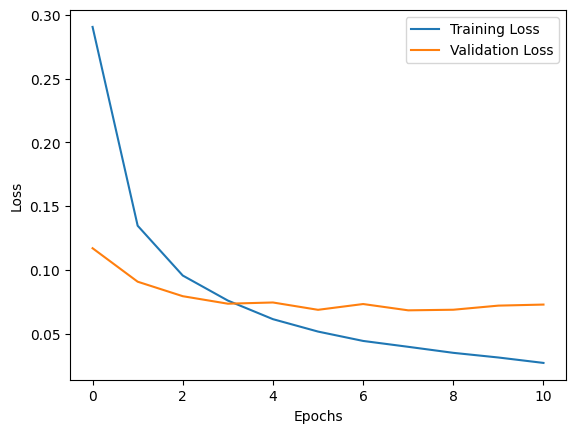

In [19]:

# 6) Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
# 7) Evaluate on Test Set
print("Final evaluation on test data:")
model.evaluate(x_test, y_test)

Final evaluation on test data:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.0804


[0.06922028958797455, 0.9797999858856201]

In [21]:
# 8) Predict Example
sample = x_test[13].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[13])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Label: 0
True Label: 0


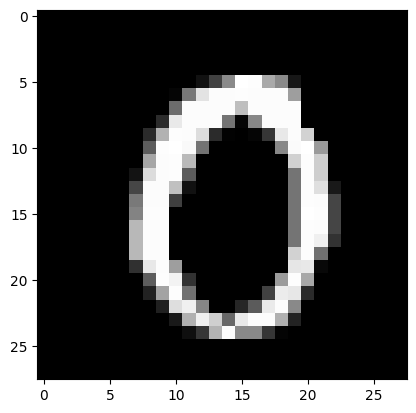

In [22]:
plt.imshow(x_test[13], cmap="gray")
plt.show()

# 📝 Student Tasks Part #1

### Task 1 – Test Model Predictions
- Select **3 different samples** from `x_test`.  
- Run them through `model.predict(...)`.  
- Print both the **Predicted Label** and the **True Label** for each sample.  

---

### Task 2 – Upload & Predict Custom Image
1. Open **Paint** (or any drawing tool) and draw a digit (0–9).  
2. Save the image in `.png` format.  
3. Import the image using **PIL**:
   ```python
   from PIL import Image
   img = Image.open("your_image.png")


**Important**:  
- Make sure you convert the image to **Gray Scale**
- Make sure you **reshape** the image into the same shape as the training data.
- Apply the same **preprocessing** (e.g., normalize pixel values between 0 and 1).  
  - If the model expects a 3D array `(28, 28, 1)`, expand the dimensions using `np.expand_dims(...)`.  
  - Double-check input shape consistency before prediction to avoid errors.  

- Run `model.predict(...)` on your new image and print the result.  
Visualize the uploaded image using `plt.imshow(...)` to confirm it looks correct before prediction.

---

### Task 3 – Training Modification For part 1
- Change the number of `epochs` from **5 → 10**. and try more epochs
- Retrain the model.  
- Compare the results (**accuracy, loss**) with the previous training run.  
- Plot the new training and validation loss/accuracy curves for better visualization.

---

### Task 4 – EarlyStopping Scenario for part 2
- Suppose you set `epochs=50` with `patience=3`.
- Observe what happens during training.
- Explain: Why will the model stop early, and at which epoch approximately?
- Discuss how `patience` interacts with the maximum `epochs` setting.
- Suppose you set `epochs=50` with `patience=5` and again the above

In [26]:
import numpy as np
from PIL import Image
img = Image.open("/content/Screenshot 2025-11-17 195943.png")


In [28]:
img = img.convert("L")
img = img.resize((28, 28))
img_arr = np.array(img)
img_arr = img_arr.reshape(1, 28, 28,)

pred = model.predict(img_arr)

print("Predicted Label:", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Label: 9
